In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)

In [2]:
df = pd.read_csv('./merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 65 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


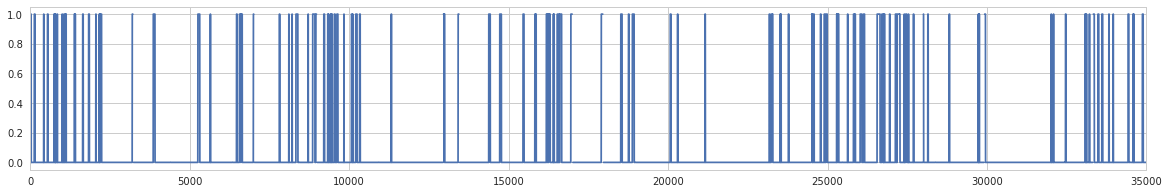

In [3]:
df['swell'].plot()

In [4]:
df[df['swell'].isnull()]

,hour,climate,weather_deterioration,swell,21229_GUST풍속 1(m/s),21229_GUST풍속(m/s),21229_기온(°C),21229_수온(°C),21229_습도(%),21229_유의파고(m),...,22190_GUST풍속(m/s),22190_현지기압(hPa),22190_습도(%),22190_기온(°C),22190_수온(°C),22190_최대파고(m),22190_유의파고(m),22190_평균파고(m),22190_파주기(sec),22190_파향(deg)
3216,2014051807,?,0,NaN,2.5,NaN,15.5,15.0,89.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,2014051808,?,0,NaN,3.4,NaN,15.6,15.2,90.0,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,2014051809,?,0,NaN,3.8,NaN,15.6,15.4,89.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,2014051810,?,0,NaN,3.0,NaN,15.8,15.7,89.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,2014051811,?,0,NaN,3.9,NaN,15.9,16.1,90.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,2014051812,?,0,NaN,4.8,NaN,16.3,16.2,84.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,2014051813,?,0,NaN,4.5,NaN,16.6,16.5,83.0,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3223,2014051814,?,0,NaN,4.2,NaN,16.6,16.6,82.0,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3224,2014051815,?,0,NaN,4.5,NaN,16.6,16.6,83.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3225,2014051816,?,0,NaN,4.6,NaN,16.7,16.5,82.0,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 66 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 non-null float64
21229_수온(°C)             34629 non-null float64
21229_습도(%)              33939 non-null float64
21229_유의파고(m)            34700 non-null float64
21229_일시                 34817 non-null float64
21229_최대파고(m)            34788 non-null float64
21229_파주기(sec)           34800 non-null float64
21229_파향(deg)            34808 non-null float64
21229_평균파고(m)            34606 non-null float64
21229_풍속(m/s)            26122 non-null float64
21229_풍속1(m/s)           8638 non-null float64
21229_풍향(deg)            26121 non-null float64
21229_풍향1(deg)           8639 non-

In [6]:
features = ['hour','swell','21229_파주기(sec)','22105_파주기(sec)','22106_파주기(sec)']
target = ['swell(t+1)']

In [7]:
train = df[features + target].fillna(method='ffill')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 6 columns):
hour              34992 non-null int64
swell             34992 non-null float64
21229_파주기(sec)    34992 non-null float64
22105_파주기(sec)    34992 non-null float64
22106_파주기(sec)    34992 non-null float64
swell(t+1)        34992 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [8]:
X = train[features].values
y = train[target].values

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [10]:
X = minmax_scale(X,feature_range=(0,1))

In [11]:
X.shape

(34992, 5)

In [12]:
kmeans = KMeans(n_clusters=3,max_iter=10000)
pred = kmeans.fit_predict(X)

In [13]:
train['pred'] = pred

In [15]:
train.groupby(['pred','swell(t+1)']).count()[['21229_파주기(sec)']]

21229_파주기(sec)
pred swell(t+1)                
0    0.0                  15836
     1.0                     68
1    0.0                  16220
     1.0                     60
2    0.0                    128
     1.0                   2680

In [17]:
df[df['climate'] == '?'].index

Int64Index([ 3216,  3217,  3218,  3219,  3220,  3221,  3222,  3223,  3224,
             3225,
            ...
            34502, 34503, 34504, 34505, 34506, 34507, 34508, 34509, 34510,
            34511],
           dtype='int64', length=600)

In [18]:
train.loc[df[df['climate'] == '?'].index]['pred'].value_counts()

1    264
2    216
0    120
Name: pred, dtype: int64

In [19]:
test_df = train.loc[df[df['climate'] == '?'].index]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 3216 to 34511
Data columns (total 7 columns):
hour              600 non-null int64
swell             600 non-null float64
21229_파주기(sec)    600 non-null float64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
swell(t+1)        600 non-null float64
pred              600 non-null int32
dtypes: float64(5), int32(1), int64(1)
memory usage: 35.2 KB


In [20]:
test_df

,hour,swell,21229_파주기(sec),22105_파주기(sec),22106_파주기(sec),swell(t+1),pred
3216,2014051807,1.0,9.1,9.1,9.1,1.0,2
3217,2014051808,1.0,9.1,9.1,10.7,1.0,2
3218,2014051809,1.0,9.1,9.1,9.1,1.0,2
3219,2014051810,1.0,9.1,9.1,9.1,1.0,2
3220,2014051811,1.0,9.1,8.0,9.1,1.0,2
3221,2014051812,1.0,9.1,9.1,9.1,1.0,2
3222,2014051813,1.0,10.7,8.0,9.1,1.0,2
3223,2014051814,1.0,9.1,8.0,9.1,1.0,2
3224,2014051815,1.0,10.7,9.1,8.0,1.0,2
3225,2014051816,1.0,10.7,9.1,9.1,1.0,2
